# Task 1: Data Preparation & Initial Analysis

## Milestone 1: Data Preparation & Initial Analysis (Weeks 1-2)

### Objectives:
- Download the Global Weather Repository dataset from Kaggle
- Set up project environment
- Inspect dataset structure, data types, and key variables
- Identify missing values, anomalies, and data coverage
- Handle missing or inconsistent entries
- Convert units and normalize values
- Aggregate or filter data (e.g., daily to monthly averages)

### Deliverable:
Cleaned and preprocessed dataset, along with a summary document outlining data schema, key variables, and data quality issues.


In [1]:
# Import required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
from datetime import datetime
import os

warnings.filterwarnings('ignore')

# Set display options
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)

# Try to use seaborn style, fallback to default if not available
try:
    plt.style.use('seaborn-darkgrid')
except OSError:
    try:
        plt.style.use('seaborn-v0_8')
    except OSError:
        plt.style.use('default')

sns.set_palette("husl")

print("Libraries imported successfully!")
print(f"Pandas version: {pd.__version__}")
print(f"NumPy version: {np.__version__}")


Libraries imported successfully!
Pandas version: 2.3.2
NumPy version: 2.2.6


## Step 1: Data Acquisition

### Option 1: Download from Kaggle (if not already downloaded)
If you need to download the dataset, use the Kaggle API:
```python
# Install kaggle: pip install kaggle
# Set up Kaggle API credentials in ~/.kaggle/kaggle.json
# Then run:
# !kaggle datasets download -d nelgiriyewithana/global-weather-repository
# !unzip global-weather-repository.zip
```

### Option 2: Load existing dataset
We'll load the existing CSV file.


In [2]:
# Load the dataset
file_path = 'GlobalWeatherRepository.csv'

if os.path.exists(file_path):
    print(f"Loading dataset from {file_path}...")
    df = pd.read_csv(file_path)
    print(f"Dataset loaded successfully!")
    print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
else:
    print(f"Error: File {file_path} not found!")
    print("Please ensure the dataset is in the current directory.")


Loading dataset from GlobalWeatherRepository.csv...
Dataset loaded successfully!
Shape: 107,768 rows × 41 columns


## Step 2: Data Understanding & Exploration


In [3]:
# Display first few rows
print("First 5 rows of the dataset:")
print("=" * 80)
df.head()


First 5 rows of the dataset:


,country,location_name,latitude,longitude,timezone,last_updated_epoch,last_updated,temperature_celsius,temperature_fahrenheit,condition_text,wind_mph,wind_kph,wind_degree,wind_direction,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,sunrise,sunset,moonrise,moonset,moon_phase,moon_illumination
0,Afghanistan,Kabul,34.52,69.18,Asia/Kabul,1715849100,2024-05-16 13:15,26.6,79.8,Partly Cloudy,8.3,13.3,338,NNW,1012.0,29.89,0.0,0.00,24,30,25.3,77.5,10.0,6.0,7.0,9.5,15.3,277.0,103.0,1.1,0.2,8.4,26.6,1,1,04:50 AM,06:50 PM,12:12 PM,01:11 AM,Waxing Gibbous,55
1,Albania,Tirana,41.33,19.82,Europe/Tirane,1715849100,2024-05-16 10:45,19.0,66.2,Partly cloudy,6.9,11.2,320,NW,1012.0,29.88,0.1,0.00,94,75,19.0,66.2,10.0,6.0,5.0,11.4,18.4,193.6,97.3,0.9,0.1,1.1,2.0,1,1,05:21 AM,07:54 PM,12:58 PM,02:14 AM,Waxing Gibbous,55
2,Algeria,Algiers,36.76,3.05,Africa/Algiers,1715849100,2024-05-16 09:45,23.0,73.4,Sunny,9.4,15.1,280,W,1011.0,29.85,0.0,0.00,29,0,24.6,76.4,10.0,6.0,5.0,13.9,22.3,540.7,12.2,65.1,13.4,10.4,18.4,1,1,05:40 AM,07:50 PM,01:15 PM,02:14 AM,Waxing Gibbous,55
3,Andorra,Andorra La Vella,42.50,1.52,Europe/Andorra,1715849100,2024-05-16 10:45,6.3,43.3,Light drizzle,7.4,11.9,215,SW,1007.0,29.75,0.3,0.01,61,100,3.8,38.9,2.0,1.0,2.0,8.5,13.7,170.2,64.4,1.6,0.2,0.7,0.9,1,1,06:31 AM,09:11 PM,02:12 PM,03:31 AM,Waxing Gibbous,55
4,Angola,Luanda,-8.84,13.23,Africa/Luanda,1715849100,2024-05-16 09:45,26.0,78.8,Partly cloudy,8.1,13.0,150,SSE,1011.0,29.85,0.0,0.00,89,50,28.7,83.6,10.0,6.0,8.0,12.5,20.2,2964.0,19.0,72.7,31.5,183.4,262.3,5,10,06:12 AM,05:55 PM,01:17 PM,12:38 AM,Waxing Gibbous,55


In [4]:
# Display basic information about the dataset
print("Dataset Information:")
print("=" * 80)
print(f"Total Rows: {len(df):,}")
print(f"Total Columns: {len(df.columns)}")
print(f"\nColumn Names:")
for i, col in enumerate(df.columns, 1):
    print(f"{i:2d}. {col}")

print("\n" + "=" * 80)
print("\nData Types:")
print(df.dtypes)


Dataset Information:
Total Rows: 107,768
Total Columns: 41

Column Names:
 1. country
 2. location_name
 3. latitude
 4. longitude
 5. timezone
 6. last_updated_epoch
 7. last_updated
 8. temperature_celsius
 9. temperature_fahrenheit
10. condition_text
11. wind_mph
12. wind_kph
13. wind_degree
14. wind_direction
15. pressure_mb
16. pressure_in
17. precip_mm
18. precip_in
19. humidity
20. cloud
21. feels_like_celsius
22. feels_like_fahrenheit
23. visibility_km
24. visibility_miles
25. uv_index
26. gust_mph
27. gust_kph
28. air_quality_Carbon_Monoxide
29. air_quality_Ozone
30. air_quality_Nitrogen_dioxide
31. air_quality_Sulphur_dioxide
32. air_quality_PM2.5
33. air_quality_PM10
34. air_quality_us-epa-index
35. air_quality_gb-defra-index
36. sunrise
37. sunset
38. moonrise
39. moonset
40. moon_phase
41. moon_illumination


Data Types:
country                          object
location_name                    object
latitude                        float64
longitude                       fl

In [5]:
# Statistical summary
print("Statistical Summary:")
print("=" * 80)
df.describe()


Statistical Summary:


,latitude,longitude,last_updated_epoch,temperature_celsius,temperature_fahrenheit,wind_mph,wind_kph,wind_degree,pressure_mb,pressure_in,precip_mm,precip_in,humidity,cloud,feels_like_celsius,feels_like_fahrenheit,visibility_km,visibility_miles,uv_index,gust_mph,gust_kph,air_quality_Carbon_Monoxide,air_quality_Ozone,air_quality_Nitrogen_dioxide,air_quality_Sulphur_dioxide,air_quality_PM2.5,air_quality_PM10,air_quality_us-epa-index,air_quality_gb-defra-index,moon_illumination
count,107768.000000,107768.000000,1.077680e+05,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000,107768.000000
mean,19.169007,22.045126,1.739835e+09,22.530220,72.556160,8.147381,13.115391,170.661876,1014.039696,29.943927,0.140482,0.005336,64.886896,39.487390,23.555598,74.393647,9.616250,5.689490,3.718518,11.402314,18.352326,499.148719,61.205247,15.589869,10.943760,25.273134,51.250554,1.730866,2.685983,49.755233
std,24.443505,65.803116,1.384028e+07,8.885309,15.993374,7.646103,12.302538,102.762325,11.015517,0.325242,0.593075,0.023435,24.161443,33.831658,10.617089,19.108998,2.541093,1.582039,3.603009,8.908272,14.336485,818.665073,31.768866,25.341109,39.057444,39.430747,158.335319,0.965128,2.514524,35.110054
min,-41.300000,-175.200000,1.715849e+09,-24.900000,-12.800000,2.200000,3.600000,1.000000,947.000000,27.960000,0.000000,0.000000,2.000000,0.000000,-35.600000,-32.100000,0.000000,0.000000,0.000000,2.200000,3.600000,-9999.000000,0.000000,0.000000,-9999.000000,0.168000,-1848.150000,1.000000,1.000000,0.000000
25%,3.750000,-6.836100,1.727861e+09,17.400000,63.300000,4.000000,6.500000,83.000000,1010.000000,29.830000,0.000000,0.000000,48.000000,0.000000,17.400000,63.300000,10.000000,6.000000,0.400000,6.400000,10.400000,225.700000,41.000000,1.480000,0.925000,7.215000,10.360000,1.000000,1.000000,15.000000
50%,17.250000,23.316700,1.739874e+09,24.400000,75.900000,6.900000,11.200000,164.000000,1013.000000,29.930000,0.000000,0.000000,70.000000,27.000000,25.800000,78.400000,10.000000,6.000000,2.700000,9.800000,15.700000,317.100000,58.000000,5.180000,2.405000,14.615000,21.090000,1.000000,2.000000,50.000000
75%,40.400000,50.580000,1.751796e+09,28.200000,82.800000,11.200000,18.000000,256.000000,1018.000000,30.060000,0.030000,0.000000,84.000000,75.000000,30.500000,87.000000,10.000000,6.000000,6.300000,15.100000,24.200000,493.950000,78.000000,17.945000,8.880000,28.675000,43.660000,2.000000,3.000000,84.000000
max,64.150000,179.220000,1.763709e+09,49.200000,120.600000,1841.200000,2963.200000,360.000000,3006.000000,88.770000,42.240000,1.660000,100.000000,100.000000,51.200000,124.200000,32.000000,19.000000,16.300000,1845.700000,2970.400000,38879.398000,480.700000,427.700000,521.330000,1614.100000,6037.290000,6.000000,10.000000,100.000000


In [6]:
# Check for missing values
print("Missing Values Analysis:")
print("=" * 80)
missing_data = df.isnull().sum()
missing_percent = (missing_data / len(df)) * 100
missing_df = pd.DataFrame({
    'Column': missing_data.index,
    'Missing Count': missing_data.values,
    'Missing Percentage': missing_percent.values
})
missing_df = missing_df[missing_df['Missing Count'] > 0].sort_values('Missing Count', ascending=False)

if len(missing_df) > 0:
    print(missing_df.to_string(index=False))
else:
    print("No missing values found in the dataset!")

print(f"\nTotal missing values: {df.isnull().sum().sum()}")
print(f"Percentage of missing data: {(df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")


Missing Values Analysis:
No missing values found in the dataset!

Total missing values: 0
Percentage of missing data: 0.00%


In [7]:
# Check for duplicate rows
print("Duplicate Rows Analysis:")
print("=" * 80)
duplicate_count = df.duplicated().sum()
print(f"Number of duplicate rows: {duplicate_count}")
if duplicate_count > 0:
    print(f"Percentage of duplicates: {(duplicate_count / len(df)) * 100:.2f}%")
    print("\nSample duplicate rows:")
    print(df[df.duplicated(keep=False)].head(10))
else:
    print("No duplicate rows found!")


Duplicate Rows Analysis:
Number of duplicate rows: 0
No duplicate rows found!


In [8]:
# Explore unique values in categorical columns
print("Categorical Columns Analysis:")
print("=" * 80)
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    unique_count = df[col].nunique()
    print(f"\n{col}:")
    print(f"Unique values: {unique_count}")
    if unique_count <= 20:
        print(f"Values: {df[col].unique()}")
    else:
        print(f"Sample values: {df[col].unique()[:10]}")


Categorical Columns Analysis:

country:
Unique values: 211
Sample values: ['Afghanistan' 'Albania' 'Algeria' 'Andorra' 'Angola'
 'Antigua and Barbuda' 'Argentina' 'Armenia' 'Australia' 'Austria']

location_name:
Unique values: 254
Sample values: ['Kabul' 'Tirana' 'Algiers' 'Andorra La Vella' 'Luanda' "Saint John's"
 'Buenos Aires' 'Yerevan' 'Canberra' 'Vienna']

timezone:
Unique values: 197
Sample values: ['Asia/Kabul' 'Europe/Tirane' 'Africa/Algiers' 'Europe/Andorra'
 'Africa/Luanda' 'America/Antigua' 'America/Argentina/Buenos_Aires'
 'Asia/Yerevan' 'Australia/Sydney' 'Europe/Vienna']

last_updated:
Unique values: 18597
Sample values: ['2024-05-16 13:15' '2024-05-16 10:45' '2024-05-16 09:45'
 '2024-05-16 04:45' '2024-05-16 05:45' '2024-05-16 12:45'
 '2024-05-16 18:45' '2024-05-16 11:45' '2024-05-16 14:45'
 '2024-05-16 02:45']

condition_text:
Unique values: 47
Sample values: ['Partly Cloudy' 'Partly cloudy' 'Sunny' 'Light drizzle' 'Clear'
 'Overcast' 'Moderate or heavy rain with thund

In [9]:
# Geographic coverage analysis
print("Geographic Coverage:")
print("=" * 80)
print(f"Number of unique countries: {df['country'].nunique()}")
print(f"Number of unique locations: {df['location_name'].nunique()}")
print(f"\nCountries in dataset: {df['country'].nunique()} countries")
print(f"\nTop 10 countries by number of locations:")
print(df.groupby('country')['location_name'].nunique().sort_values(ascending=False).head(10))


Geographic Coverage:
Number of unique countries: 211
Number of unique locations: 254

Countries in dataset: 211 countries

Top 10 countries by number of locations:
country
Paraguay      6
Belgium       5
Indonesia     4
Palau         4
Cameroon      4
Bulgaria      3
Costa Rica    3
Maldives      3
Jamaica       3
Iceland       3
Name: location_name, dtype: int64


In [10]:
# Time coverage analysis
print("Time Coverage Analysis:")
print("=" * 80)
# Convert last_updated to datetime
df['last_updated'] = pd.to_datetime(df['last_updated'])
print(f"Date range: {df['last_updated'].min()} to {df['last_updated'].max()}")
print(f"Total unique dates: {df['last_updated'].dt.date.nunique()}")

# Check timezone distribution
print(f"\nNumber of unique timezones: {df['timezone'].nunique()}")
print(f"\nTop 10 timezones:")
print(df['timezone'].value_counts().head(10))


Time Coverage Analysis:
Date range: 2024-05-16 01:45:00 to 2025-11-21 20:15:00
Total unique dates: 554

Number of unique timezones: 197

Top 10 timezones:
timezone
Asia/Bangkok           2070
Europe/Rome            1330
Europe/Sofia           1192
America/La_Paz         1124
Asia/Jakarta           1109
Europe/Istanbul        1107
Asia/Tehran            1106
Africa/Khartoum        1106
Europe/Brussels        1078
Indian/Antananarivo    1012
Name: count, dtype: int64


## Step 3: Data Cleaning & Preprocessing


In [11]:
# Create a copy for cleaning
df_clean = df.copy()
print(f"Original dataset shape: {df_clean.shape}")

# Remove duplicate rows
df_clean = df_clean.drop_duplicates()
print(f"After removing duplicates: {df_clean.shape}")

# Handle missing values in key numerical columns
print("\nHandling missing values...")
numerical_cols = df_clean.select_dtypes(include=[np.number]).columns

# For weather measurements, we'll use forward fill for same location, then median
for col in ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph', 'precip_mm']:
    if col in df_clean.columns:
        # Forward fill by location
        df_clean[col] = df_clean.groupby('location_name')[col].ffill()
        # Fill remaining with median
        df_clean[col] = df_clean[col].fillna(df_clean[col].median())

print("Missing values handled!")


Original dataset shape: (107768, 41)
After removing duplicates: (107768, 41)

Handling missing values...
Missing values handled!


In [12]:
# Check for anomalies in key variables
print("Anomaly Detection:")
print("=" * 80)

# Temperature anomalies (outside reasonable range: -50 to 60°C)
temp_anomalies = df_clean[(df_clean['temperature_celsius'] < -50) | (df_clean['temperature_celsius'] > 60)]
print(f"Temperature anomalies: {len(temp_anomalies)} rows")
if len(temp_anomalies) > 0:
    print(temp_anomalies[['country', 'location_name', 'temperature_celsius']].head())

# Humidity anomalies (should be 0-100%)
humidity_anomalies = df_clean[(df_clean['humidity'] < 0) | (df_clean['humidity'] > 100)]
print(f"\nHumidity anomalies: {len(humidity_anomalies)} rows")

# Pressure anomalies (reasonable range: 800-1100 mb)
pressure_anomalies = df_clean[(df_clean['pressure_mb'] < 800) | (df_clean['pressure_mb'] > 1100)]
print(f"Pressure anomalies: {len(pressure_anomalies)} rows")

# Wind speed anomalies (reasonable range: 0-400 kph)
wind_anomalies = df_clean[(df_clean['wind_kph'] < 0) | (df_clean['wind_kph'] > 400)]
print(f"Wind speed anomalies: {len(wind_anomalies)} rows")


Anomaly Detection:
Temperature anomalies: 0 rows

Humidity anomalies: 0 rows
Pressure anomalies: 2 rows
Wind speed anomalies: 1 rows


In [13]:
# Clean anomalies by clipping to reasonable ranges
print("Cleaning anomalies...")
df_clean['temperature_celsius'] = df_clean['temperature_celsius'].clip(-50, 60)
df_clean['humidity'] = df_clean['humidity'].clip(0, 100)
df_clean['pressure_mb'] = df_clean['pressure_mb'].clip(800, 1100)
df_clean['wind_kph'] = df_clean['wind_kph'].clip(0, 400)
df_clean['precip_mm'] = df_clean['precip_mm'].clip(0, 1000)  # Max 1000mm precipitation
df_clean['cloud'] = df_clean['cloud'].clip(0, 100)
df_clean['uv_index'] = df_clean['uv_index'].clip(0, 15)

print("Anomalies cleaned!")


Cleaning anomalies...
Anomalies cleaned!


In [14]:
# Convert and normalize units
print("Unit Conversion and Normalization:")
print("=" * 80)

# Ensure temperature consistency (already have both Celsius and Fahrenheit)
# Add Kelvin for scientific analysis
df_clean['temperature_kelvin'] = df_clean['temperature_celsius'] + 273.15

# Normalize wind speed (already have both mph and kph)
# Normalize pressure (already have both mb and in)

# Create derived features
df_clean['date'] = df_clean['last_updated'].dt.date
df_clean['year'] = df_clean['last_updated'].dt.year
df_clean['month'] = df_clean['last_updated'].dt.month
df_clean['day'] = df_clean['last_updated'].dt.day
df_clean['day_of_week'] = df_clean['last_updated'].dt.day_name()
df_clean['hour'] = df_clean['last_updated'].dt.hour

# Create season column (Northern Hemisphere)
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

df_clean['season'] = df_clean['month'].apply(get_season)

print("Unit conversion and feature engineering completed!")
print(f"New columns added: date, year, month, day, day_of_week, hour, season, temperature_kelvin")


Unit Conversion and Normalization:
Unit conversion and feature engineering completed!
New columns added: date, year, month, day, day_of_week, hour, season, temperature_kelvin


## Step 4: Data Aggregation


In [15]:
# Create monthly aggregated dataset
print("Creating Monthly Aggregated Dataset:")
print("=" * 80)

monthly_cols = ['temperature_celsius', 'humidity', 'pressure_mb', 'wind_kph', 
                'precip_mm', 'cloud', 'uv_index', 'feels_like_celsius']

monthly_agg = df_clean.groupby(['country', 'location_name', 'year', 'month', 'latitude', 'longitude']).agg({
    'temperature_celsius': ['mean', 'min', 'max', 'std'],
    'humidity': ['mean', 'min', 'max'],
    'pressure_mb': ['mean', 'min', 'max'],
    'wind_kph': ['mean', 'min', 'max'],
    'precip_mm': ['sum', 'mean', 'max'],
    'cloud': ['mean'],
    'uv_index': ['mean', 'max'],
    'feels_like_celsius': ['mean']
}).reset_index()

# Flatten column names
monthly_agg.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in monthly_agg.columns]

print(f"Monthly aggregated dataset shape: {monthly_agg.shape}")
print(f"\nSample of monthly data:")
monthly_agg.head()


Creating Monthly Aggregated Dataset:
Monthly aggregated dataset shape: (3972, 26)

Sample of monthly data:


,country,location_name,year,month,latitude,longitude,temperature_celsius_mean,temperature_celsius_min,temperature_celsius_max,temperature_celsius_std,humidity_mean,humidity_min,humidity_max,pressure_mb_mean,pressure_mb_min,pressure_mb_max,wind_kph_mean,wind_kph_min,wind_kph_max,precip_mm_sum,precip_mm_mean,precip_mm_max,cloud_mean,uv_index_mean,uv_index_max,feels_like_celsius_mean
0,Afghanistan,Kabul,2024,5,34.52,69.18,20.305882,14.1,26.6,3.062571,38.058824,17,77,1010.000000,1006.0,1017.0,11.517647,3.6,24.1,1.85,0.108824,0.72,31.764706,3.764706,7.0,20.358824
1,Afghanistan,Kabul,2024,6,34.52,69.18,25.590000,17.4,32.9,3.795310,24.833333,13,43,1004.900000,998.0,1013.0,17.110000,6.1,31.0,2.18,0.072667,1.86,20.833333,6.500000,8.0,24.603333
2,Afghanistan,Kabul,2024,7,34.52,69.18,31.303448,26.7,36.1,2.457275,17.931034,8,40,998.000000,992.0,1004.0,20.731034,8.3,40.3,0.01,0.000345,0.01,13.068966,7.758621,9.0,29.475862
3,Afghanistan,Kabul,2024,8,34.52,69.18,30.848387,22.5,34.7,3.006312,20.548387,7,55,1001.258065,996.0,1010.0,20.196774,7.2,37.4,1.15,0.037097,0.83,11.903226,7.483871,8.0,29.316129
4,Afghanistan,Kabul,2024,9,34.52,69.18,28.216667,24.5,32.3,2.155839,13.733333,4,29,1004.800000,1000.0,1009.0,12.223333,5.4,31.0,0.43,0.014333,0.40,13.066667,7.000000,8.0,26.390000


In [16]:
# Create daily aggregated dataset (average per day per location)
print("Creating Daily Aggregated Dataset:")
print("=" * 80)

daily_agg = df_clean.groupby(['country', 'location_name', 'date', 'latitude', 'longitude']).agg({
    'temperature_celsius': ['mean', 'min', 'max'],
    'humidity': 'mean',
    'pressure_mb': 'mean',
    'wind_kph': ['mean', 'max'],
    'precip_mm': 'sum',
    'cloud': 'mean',
    'uv_index': 'max',
    'condition_text': lambda x: x.mode()[0] if len(x.mode()) > 0 else 'Unknown'
}).reset_index()

# Flatten column names
daily_agg.columns = ['_'.join(col).strip('_') if col[1] else col[0] for col in daily_agg.columns]

print(f"Daily aggregated dataset shape: {daily_agg.shape}")
print(f"\nSample of daily data:")
daily_agg.head()


Creating Daily Aggregated Dataset:
Daily aggregated dataset shape: (107523, 16)

Sample of daily data:


,country,location_name,date,latitude,longitude,temperature_celsius_mean,temperature_celsius_min,temperature_celsius_max,humidity_mean,pressure_mb_mean,wind_kph_mean,wind_kph_max,precip_mm_sum,cloud_mean,uv_index_max,condition_text_<lambda>
0,Afghanistan,Kabul,2024-05-16,34.52,69.18,24.3,22.0,26.6,32.5,1013.0,10.25,13.3,0.03,59.5,7.0,Partly Cloudy
1,Afghanistan,Kabul,2024-05-17,34.52,69.18,15.0,15.0,15.0,75.0,1017.0,5.40,5.4,0.69,77.0,1.0,Patchy rain nearby
2,Afghanistan,Kabul,2024-05-18,34.52,69.18,19.5,19.5,19.5,46.0,1010.0,3.60,3.6,0.00,15.0,1.0,Clear
3,Afghanistan,Kabul,2024-05-19,34.52,69.18,16.9,16.9,16.9,52.0,1010.0,6.50,6.5,0.17,75.0,4.0,Patchy rain nearby
4,Afghanistan,Kabul,2024-05-20,34.52,69.18,14.1,14.1,14.1,77.0,1017.0,4.30,4.3,0.72,85.0,1.0,Patchy rain nearby


## Step 5: Data Quality Summary


In [17]:
# Generate data quality report
print("=" * 80)
print("DATA QUALITY SUMMARY REPORT")
print("=" * 80)

print(f"\n1. Dataset Overview:")
print(f"- Original rows: {len(df):,}")
print(f"- Cleaned rows: {len(df_clean):,}")
print(f"- Rows removed: {len(df) - len(df_clean):,}")
print(f"- Columns: {len(df_clean.columns)}")

print(f"\n2. Data Coverage:")
print(f"- Countries: {df_clean['country'].nunique()}")
print(f"- Locations: {df_clean['location_name'].nunique()}")
print(f"- Date range: {df_clean['last_updated'].min()} to {df_clean['last_updated'].max()}")
print(f"- Unique dates: {df_clean['date'].nunique()}")

print(f"\n3. Missing Values:")
missing_summary = df_clean.isnull().sum()
missing_cols = missing_summary[missing_summary > 0]
if len(missing_cols) > 0:
    for col, count in missing_cols.items():
        print(f"- {col}: {count} ({count/len(df_clean)*100:.2f}%)")
else:
    print(f"- No missing values in cleaned dataset")

print(f"\n4. Data Types:")
print(f"- Numerical columns: {len(df_clean.select_dtypes(include=[np.number]).columns)}")
print(f"- Categorical columns: {len(df_clean.select_dtypes(include=['object']).columns)}")
print(f"- DateTime columns: {len(df_clean.select_dtypes(include=['datetime64']).columns)}")

print(f"\n5. Key Variables Range:")
key_vars = {
    'temperature_celsius': 'Temperature (°C)',
    'humidity': 'Humidity (%)',
    'pressure_mb': 'Pressure (mb)',
    'wind_kph': 'Wind Speed (kph)',
    'precip_mm': 'Precipitation (mm)'
}
for var, label in key_vars.items():
    if var in df_clean.columns:
        print(f"- {label}: {df_clean[var].min():.2f} to {df_clean[var].max():.2f} (mean: {df_clean[var].mean():.2f})")

print(f"\n6. Aggregated Datasets Created:")
print(f"- Monthly aggregated: {monthly_agg.shape[0]:,} rows")
print(f"- Daily aggregated: {daily_agg.shape[0]:,} rows")

print("\n" + "=" * 80)
print("Data preparation completed successfully!")
print("=" * 80)


DATA QUALITY SUMMARY REPORT

1. Dataset Overview:
- Original rows: 107,768
- Cleaned rows: 107,768
- Rows removed: 0
- Columns: 49

2. Data Coverage:
- Countries: 211
- Locations: 254
- Date range: 2024-05-16 01:45:00 to 2025-11-21 20:15:00
- Unique dates: 554

3. Missing Values:
- No missing values in cleaned dataset

4. Data Types:
- Numerical columns: 35
- Categorical columns: 13
- DateTime columns: 1

5. Key Variables Range:
- Temperature (°C): -24.90 to 49.20 (mean: 22.53)
- Humidity (%): 2.00 to 100.00 (mean: 64.89)
- Pressure (mb): 947.00 to 1100.00 (mean: 1014.00)
- Wind Speed (kph): 3.60 to 400.00 (mean: 13.09)
- Precipitation (mm): 0.00 to 42.24 (mean: 0.14)

6. Aggregated Datasets Created:
- Monthly aggregated: 3,972 rows
- Daily aggregated: 107,523 rows

Data preparation completed successfully!


## Step 6: Save Cleaned Datasets


In [18]:
# Save cleaned datasets
print("Saving cleaned datasets...")

# Save main cleaned dataset
df_clean.to_csv('cleaned_weather_data.csv', index=False)
print(f"Saved: cleaned_weather_data.csv")

# Save monthly aggregated dataset
monthly_agg.to_csv('monthly_weather_data.csv', index=False)
print(f"Saved: monthly_weather_data.csv")

# Save daily aggregated dataset
daily_agg.to_csv('daily_weather_data.csv', index=False)
print(f"Saved: daily_weather_data.csv")

# Save data schema document
schema_doc = f"""
# Global Weather Repository - Data Schema

## Dataset Overview
- **Source**: Global Weather Repository (Kaggle)
- **Original Rows**: {len(df):,}
- **Cleaned Rows**: {len(df_clean):,}
- **Columns**: {len(df_clean.columns)}

## Key Variables

### Location Variables
- country: Country name
- location_name: City/location name
- latitude: Latitude coordinate
- longitude: Longitude coordinate
- timezone: Timezone information

### Temporal Variables
- last_updated: Timestamp of data collection
- date: Date (extracted)
- year: Year (extracted)
- month: Month (extracted)
- day: Day (extracted)
- day_of_week: Day of week name
- hour: Hour (extracted)
- season: Season (Winter/Spring/Summer/Fall)

### Weather Variables
- temperature_celsius: Temperature in Celsius
- temperature_fahrenheit: Temperature in Fahrenheit
- temperature_kelvin: Temperature in Kelvin (derived)
- feels_like_celsius: Feels-like temperature in Celsius
- condition_text: Weather condition description
- humidity: Humidity percentage (0-100)
- pressure_mb: Atmospheric pressure in millibars
- wind_kph: Wind speed in kilometers per hour
- wind_mph: Wind speed in miles per hour
- wind_degree: Wind direction in degrees
- wind_direction: Wind direction (N, S, E, W, etc.)
- precip_mm: Precipitation in millimeters
- precip_in: Precipitation in inches
- cloud: Cloud cover percentage (0-100)
- visibility_km: Visibility in kilometers
- uv_index: UV index (0-15)
- gust_kph: Wind gust speed in kph

### Air Quality Variables
- air_quality_Carbon_Monoxide: CO levels
- air_quality_Ozone: Ozone levels
- air_quality_Nitrogen_dioxide: NO2 levels
- air_quality_Sulphur_dioxide: SO2 levels
- air_quality_PM2.5: PM2.5 particulate matter
- air_quality_PM10: PM10 particulate matter
- air_quality_us-epa-index: US EPA air quality index
- air_quality_gb-defra-index: UK DEFRA air quality index

### Astronomical Variables
- sunrise: Sunrise time
- sunset: Sunset time
- moonrise: Moonrise time
- moonset: Moonset time
- moon_phase: Moon phase description
- moon_illumination: Moon illumination percentage

## Data Quality Issues Addressed
1. Removed duplicate rows
2. Handled missing values using forward fill and median imputation
3. Clipped outliers to reasonable ranges:
   - Temperature: -50°C to 60°C
   - Humidity: 0% to 100%
   - Pressure: 800 mb to 1100 mb
   - Wind speed: 0 kph to 400 kph
   - Precipitation: 0 mm to 1000 mm
   - Cloud cover: 0% to 100%
   - UV index: 0 to 15

## Aggregated Datasets
1. **monthly_weather_data.csv**: Monthly averages per location
2. **daily_weather_data.csv**: Daily averages per location

## Generated: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}
"""

with open('data_schema.md', 'w', encoding='utf-8') as f:
    f.write(schema_doc)

print(f"Saved: data_schema.md")
print("\nAll datasets saved successfully!")


Saving cleaned datasets...
Saved: cleaned_weather_data.csv
Saved: monthly_weather_data.csv
Saved: daily_weather_data.csv
Saved: data_schema.md

All datasets saved successfully!


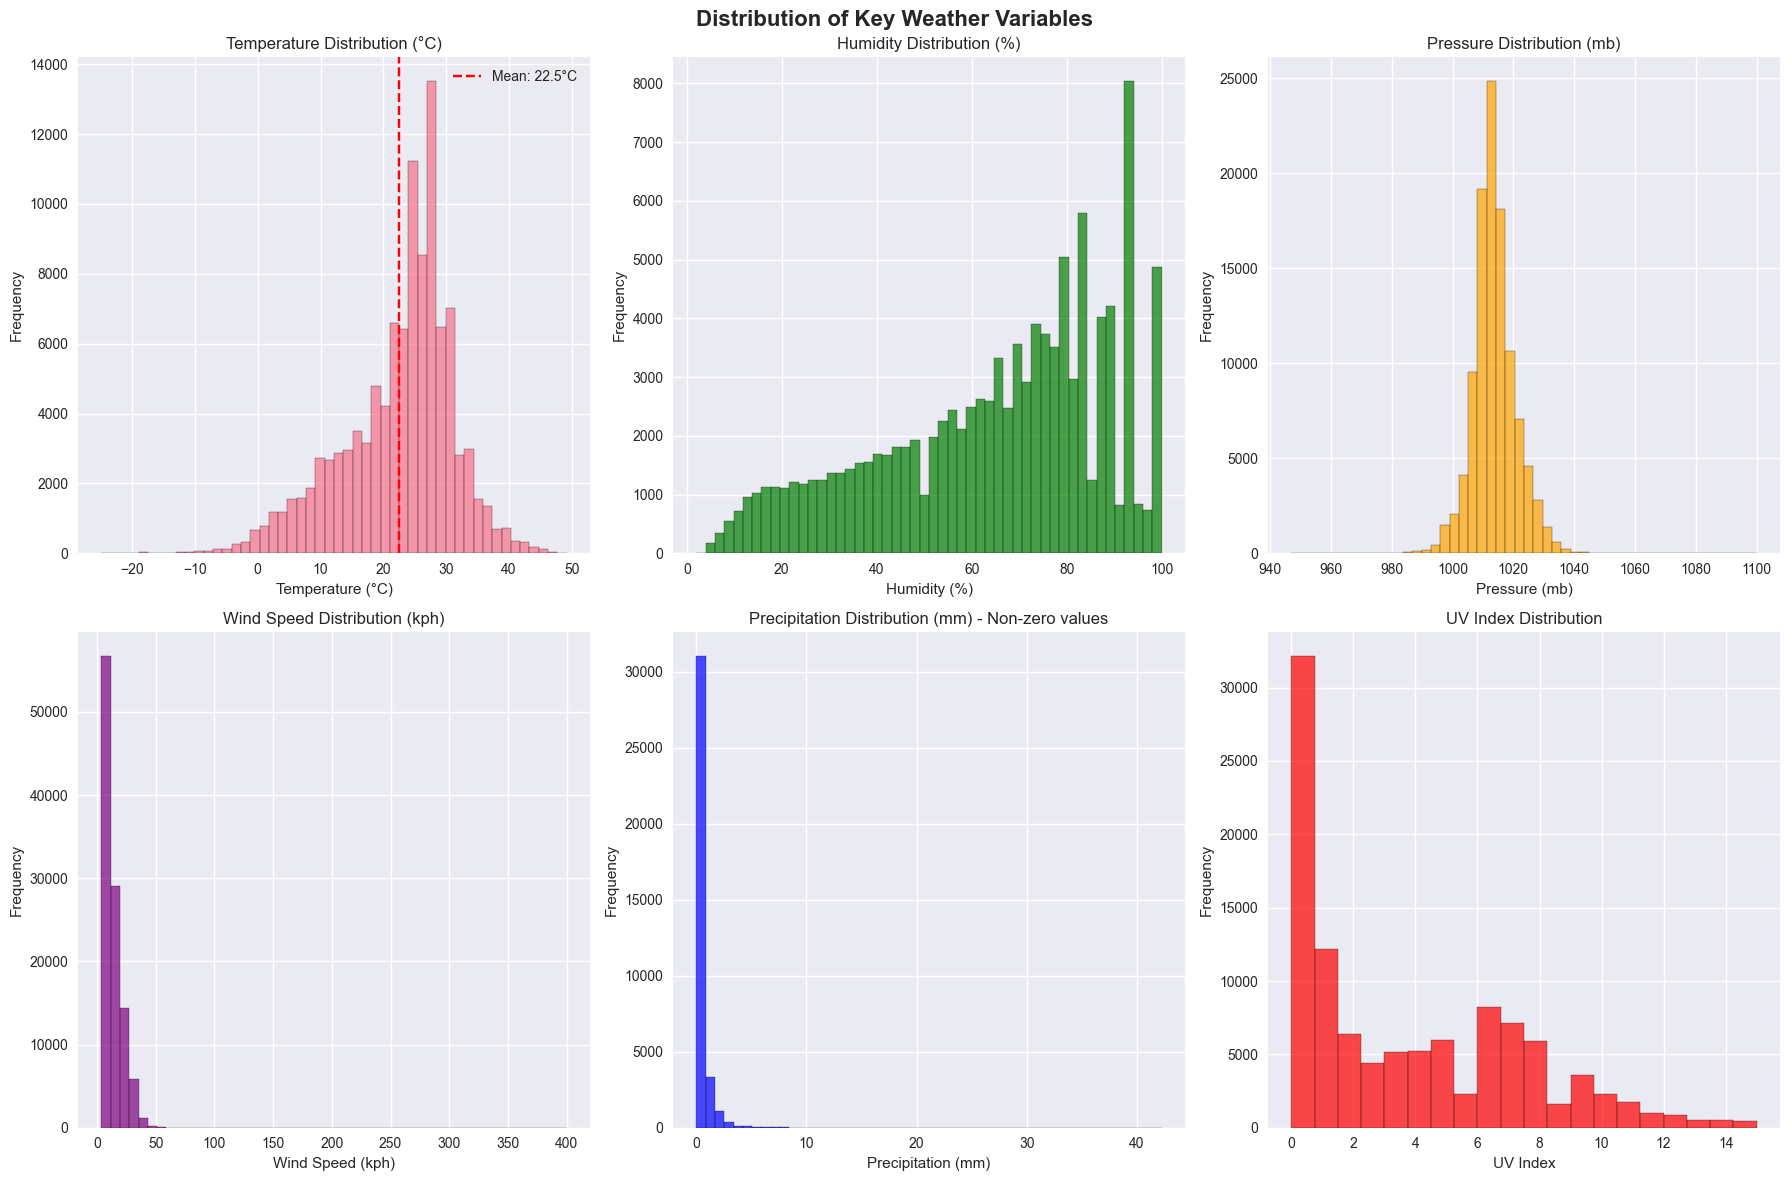

In [19]:
# Visualize data distribution for key variables
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
fig.suptitle('Distribution of Key Weather Variables', fontsize=16, fontweight='bold')

# Temperature distribution
axes[0, 0].hist(df_clean['temperature_celsius'].dropna(), bins=50, edgecolor='black', alpha=0.7)
axes[0, 0].set_title('Temperature Distribution (°C)')
axes[0, 0].set_xlabel('Temperature (°C)')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].axvline(df_clean['temperature_celsius'].mean(), color='r', linestyle='--', label=f'Mean: {df_clean["temperature_celsius"].mean():.1f}°C')
axes[0, 0].legend()

# Humidity distribution
axes[0, 1].hist(df_clean['humidity'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='green')
axes[0, 1].set_title('Humidity Distribution (%)')
axes[0, 1].set_xlabel('Humidity (%)')
axes[0, 1].set_ylabel('Frequency')

# Pressure distribution
axes[0, 2].hist(df_clean['pressure_mb'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='orange')
axes[0, 2].set_title('Pressure Distribution (mb)')
axes[0, 2].set_xlabel('Pressure (mb)')
axes[0, 2].set_ylabel('Frequency')

# Wind speed distribution
axes[1, 0].hist(df_clean['wind_kph'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='purple')
axes[1, 0].set_title('Wind Speed Distribution (kph)')
axes[1, 0].set_xlabel('Wind Speed (kph)')
axes[1, 0].set_ylabel('Frequency')

# Precipitation distribution (log scale for better visualization)
precip_data = df_clean['precip_mm'][df_clean['precip_mm'] > 0]
axes[1, 1].hist(precip_data.dropna(), bins=50, edgecolor='black', alpha=0.7, color='blue')
axes[1, 1].set_title('Precipitation Distribution (mm) - Non-zero values')
axes[1, 1].set_xlabel('Precipitation (mm)')
axes[1, 1].set_ylabel('Frequency')

# UV Index distribution
axes[1, 2].hist(df_clean['uv_index'].dropna(), bins=20, edgecolor='black', alpha=0.7, color='red')
axes[1, 2].set_title('UV Index Distribution')
axes[1, 2].set_xlabel('UV Index')
axes[1, 2].set_ylabel('Frequency')

plt.tight_layout()
plt.show()


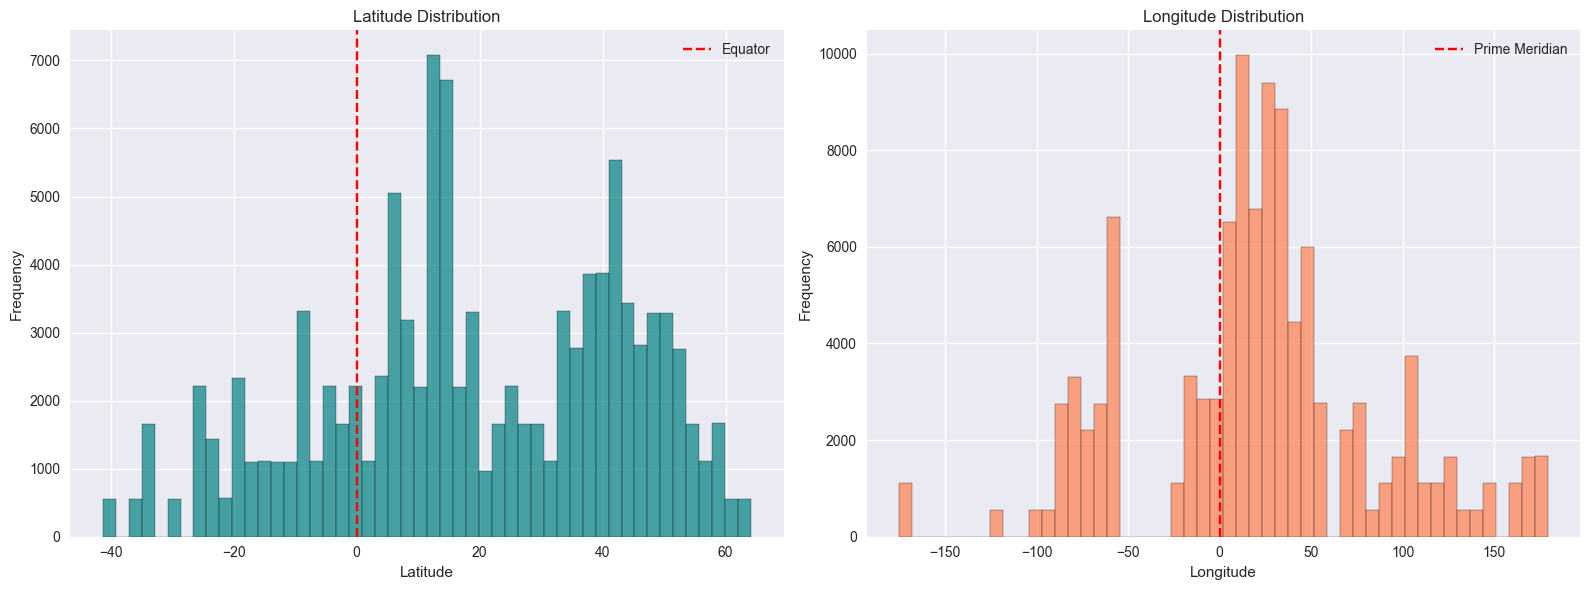

In [20]:
# Geographic distribution of data points
fig, axes = plt.subplots(1, 2, figsize=(16, 6))

# Latitude distribution
axes[0].hist(df_clean['latitude'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='teal')
axes[0].set_title('Latitude Distribution')
axes[0].set_xlabel('Latitude')
axes[0].set_ylabel('Frequency')
axes[0].axvline(0, color='r', linestyle='--', label='Equator')
axes[0].legend()

# Longitude distribution
axes[1].hist(df_clean['longitude'].dropna(), bins=50, edgecolor='black', alpha=0.7, color='coral')
axes[1].set_title('Longitude Distribution')
axes[1].set_xlabel('Longitude')
axes[1].set_ylabel('Frequency')
axes[1].axvline(0, color='r', linestyle='--', label='Prime Meridian')
axes[1].legend()

plt.tight_layout()
plt.show()
